In [125]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

def getData(fileName):
	'''
	函数作用：读取数据
	:param fileName: 数据的路径
	:return data: data[0]数据矩阵，每一行是一个样本，每一列是一个维度
				  data[1]是数组，对应每个样本的预测值
	'''
	data = load_svmlight_file(fileName)
	row, col = data[0].shape
	oneB = np.ones(row)
	dataMatrix = np.column_stack((data[0].toarray(), oneB))
	return dataMatrix, data[1]

def divideData(dataMatrix, dataLabel):
	'''
	函数作用：将数据切分成训练集和验证集
	:param dataMatrix: 数据矩阵，每一行是一个样本，每一列是一个维度
	:param dataLabel: 数组，对应每个样本的预测值
	:return testData:
	:return trainData:
	'''
	xTrain, xTest, yTrain, yTest = train_test_split(dataMatrix, dataLabel,test_size = 0.2, random_state = 42)
	return xTrain, xTest, yTrain, yTest

def getDifferenceArray(dataMatrix, dataLabel, weights):
	'''
	函数作用：计算每个样本的真实值与预测值的差
	:param dataMatrix: 数据矩阵，每一行是一个样本，每一列是一个维度
	:param dataLabel: 数组，对应每个样本的预测值
	:param weights: 数组，对应每个维度的weight
	:return loss：数组,对应每个样本的真实值与预测值的差
	'''
	predictTemp = dataMatrix * weights
	predictValueArray = predictTemp.sum(axis = 1)
	differenceArray = dataLabel - predictValueArray
	return differenceArray

def lossFunction(dataMatrix, dataLabel, weights):
	'''
	函数作用：计算Loss值
	:param dataMatrix: 数据矩阵，每一行是一个样本，每一列是一个维度
	:param dataLabel: 数组，对应每个样本的预测值
	:param weights: 数组，对应每个维度的weight
	:return loss：返回loss值
	'''
	temp = getDifferenceArray(dataMatrix, dataLabel, weights)
	temp2 = np.square(temp)
	loss = 0.5 * np.mean(temp2)
	return loss

def initialWeights(data, initialModel = None):
	'''
	函数作用：初始化weights
	:param data: data数据矩阵，每一行是一个样本，每一列是一个维度
	:return weight:返回weight值，array组织
	'''
	row, col = data.shape
	if initialModel == None:
		weights = np.zeros(col)
	elif initialModel == "random":
		weights = np.random.rand(col)
	elif initialModel == "normality":
		weights = np.random.standard_normal(col)
	return weights

def batchGradientDescent(dataMatrix, dataLabel, weights):
	'''
	函数作用：批量梯度下降
	'''
	row, col = dataMatrix.shape
	temp = getDifferenceArray(dataMatrix, dataLabel, weights)
	dataTrans = np.transpose(dataMatrix)
	temp2 = dataTrans * temp * (-1)
	G = np.mean(temp2, axis = 1)
	return G

def updataWeights(weights, D, alpha):
	'''
	函数作用：更新weights
	'''
	newWeights = weights - alpha * D
	return newWeights

def  plotPicture(trainLossList, testLossList):
    '''
    :param trainLossList:
    :param testLossList:
    :return:
    '''
    plt.title('loss value vary with the number of iterations')
    plt.plot(trainLossList, color="blue", linewidth=2.5, linestyle = "-", label="trainLoss")
    plt.plot(testLossList, color="red", linewidth=2.5, linestyle="-", label="testLoss")
    plt.legend(loc="upper right")
    plt.xlabel("figure3")
    plt.ylabel("loss")
    plt.show()

def run():
    '''
    主体函数
    '''
    path = './'
    dataFileName = path + 'housingData.txt'
    dataMatrix, dataLabel = getData(dataFileName)
    xTrain, xTest, yTrain, yTest = divideData(dataMatrix, dataLabel)
    weights = initialWeights(dataMatrix, initialModel = None)
    lossTrainList = []
    lossTestList = []
    iterNum = 8000
    learningRate = 0.05
    for i in range(iterNum):
        trainLoss = lossFunction(xTrain, yTrain, weights)
        lossTrainList.append(trainLoss)
        testLoss = lossFunction(xTest, yTest, weights)
        lossTestList.append(testLoss)
        D = batchGradientDescent(xTrain, yTrain, weights)
        weights = updataWeights(weights, D, learningRate)
    plotPicture(lossTrainList, lossTestList)
    print(xTrain.shape)
    print(xTest.shape)
    print(np.min(lossTrainList))
    print(np.min(lossTestList))

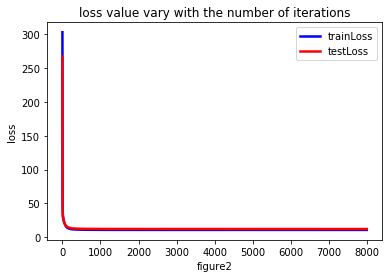

(404, 14)
(102, 14)
10.8207132306
12.146900778


In [119]:
 run()

In [157]:
def  plotPicture2(testLossList0, testLossList1, testLossList2, testLossList3, testLossList4):
    '''
    :param trainLossList:
    :param testLossList:
    :return:
    '''
    plt.title('loss value vary with the number of iterations')
    plt.plot(testLossList0, color="blue", linewidth=2.5, linestyle = "-", label="learn-rate=0.01")
    plt.plot(testLossList1, color="red", linewidth=2.5, linestyle="-", label="learn-rate=0.05")
    plt.plot(testLossList2, color="green", linewidth=2.5, linestyle="-", label="learn-rate=0.1")
    plt.plot(testLossList3, color="black", linewidth=2.5, linestyle="-", label="learn-rate=0.2")
    plt.plot(testLossList4, color="yellow", linewidth=2.5, linestyle="-", label="learn-rate=0.8")
    plt.ylim(ymin=0, ymax = 1.5)
    plt.legend(loc="upper right")
    plt.xlabel("figure4")
    plt.ylabel("loss")
    plt.show()
    
def run2():
    '''
    主体函数
    '''
    path = './'
    dataFileName = path + 'housingData.txt'
    dataMatrix, dataLabel = getData(dataFileName)
    xTrain, xTest, yTrain, yTest = divideData(dataMatrix, dataLabel)
    weights = initialWeights(dataMatrix, initialModel = None)
    weights2 = initialWeights(dataMatrix, initialModel = None)
    weights3 = initialWeights(dataMatrix, initialModel = None)
    weights4 = initialWeights(dataMatrix, initialModel = None)
    weights0 = initialWeights(dataMatrix, initialModel = None)
    lossTestList0 = []
    lossTestList = []
    lossTestList2 = []
    lossTestList3 = []
    lossTestList4 = []
    iterNum = 10
    learningRate0 = 0.01
    learningRate1 = 0.05
    learningRate2 = 0.1
    learningRate3 = 0.2
    learningRate4 = 0.5
    for i in range(iterNum):
        #learningRate0
        testLoss0 = lossFunction(xTest, yTest, weights0)
        lossTestList0.append(testLoss0)
        D = batchGradientDescent(xTrain, yTrain, weights0)
        weights0 = updataWeights(weights0, D, learningRate0)
        #learningRate1
        testLoss = lossFunction(xTest, yTest, weights)
        lossTestList.append(testLoss)
        D = batchGradientDescent(xTrain, yTrain, weights)
        weights = updataWeights(weights, D, learningRate1)
        #learningRate2
        testLoss2 = lossFunction(xTest, yTest, weights2)
        lossTestList2.append(testLoss2)
        D = batchGradientDescent(xTrain, yTrain, weights2)
        weights2 = updataWeights(weights2, D, learningRate2)
        #learningRate3
        testLoss3 = lossFunction(xTest, yTest, weights3)
        lossTestList3.append(testLoss3)
        D = batchGradientDescent(xTrain, yTrain, weights3)
        weights3 = updataWeights(weights3, D, learningRate3)
        #learningRate4
        testLoss4 = lossFunction(xTest, yTest, weights4)
        lossTestList4.append(testLoss4)
        D = batchGradientDescent(xTrain, yTrain, weights4)
        weights4 = updataWeights(weights4, D, learningRate4)
    plotPicture2(lossTestList0,lossTestList,lossTestList2,lossTestList3,lossTestList4)

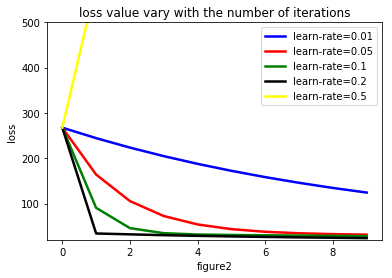

In [106]:
run2()